In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')
import absorption_line_vel as vel
from absorption_line_vel import SpectrumSN_Lines, AbsorbLine

# read spec data
z = 0.0307
spec = '../../spectroscopy/ZTF20aayhacx_20200507_P60_v2.ascii'
Spec1 = SpectrumSN_Lines(spec, z)

# 20200507_P60

## Si II 6355

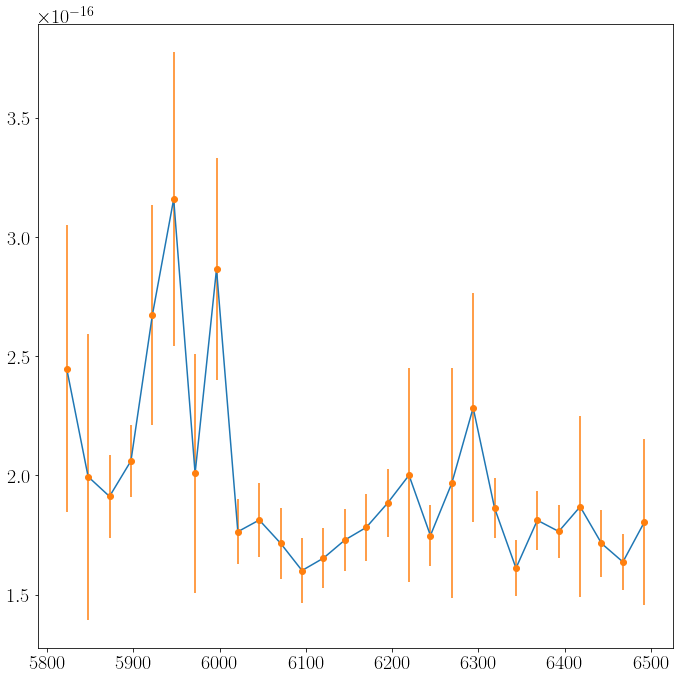

In [3]:
Spec1.plot_line_region(5800, 6500)

In [5]:
Spec1.add_line('SiII_6355', 5900, 6300, lines=[6371.359, 6347.103])

16 points within 5900.00 and 6300.00 angstroms.


In [ ]:
Spec1.line['SiII_6355'].LS_estimator()

In [ ]:
sampler = Spec1.line['SiII_6355'].MCMC_sampler(normalize_unc=True,
                                               Plot_mcmc=True,
                                               Plot_tau=True)

## Ca II IRT

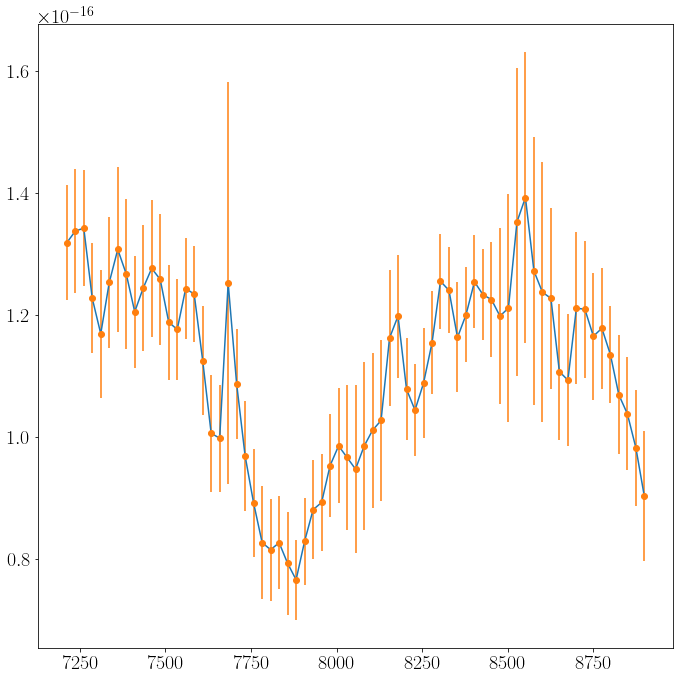

In [3]:
Spec1.plot_line_region(7200, 8900)

In [12]:
Spec1.add_line('CaII_IRT', 7300, 8450, lines=[8498.018, 8542.089, 8662.140])

46 points within 7300.00 and 8450.00 angstroms.


../absorption_line_vel.py:149: UserWarning: <=5 points within the wavelength range!
  warnings.warn(


## hvf

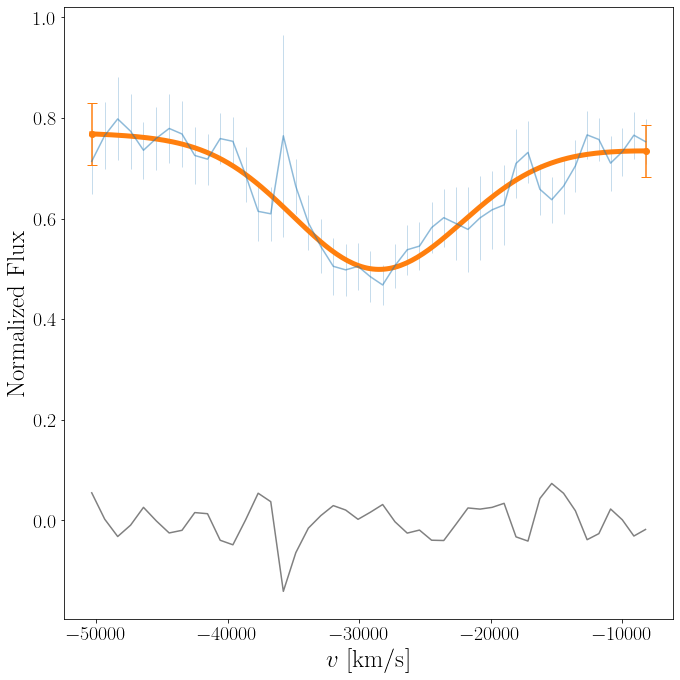

LS estimation:
Velocity pvf: -25194 km/s


In [13]:
Spec1.line['CaII_IRT'].LS_estimator()

  0%|          | 3/1000 [00:00<00:36, 27.13it/s]

Normalize factor = 0.597


  0%|          | 3/50000 [00:00<29:36, 28.14it/s]

MCMC results:
Velocity pvf: -24714 pm 406 km/s
Normalize factor = 0.597


  5%|▌         | 2500/50000 [01:15<23:47, 33.28it/s]


MCMC results:
Velocity pvf: -24756 pm 419 km/s


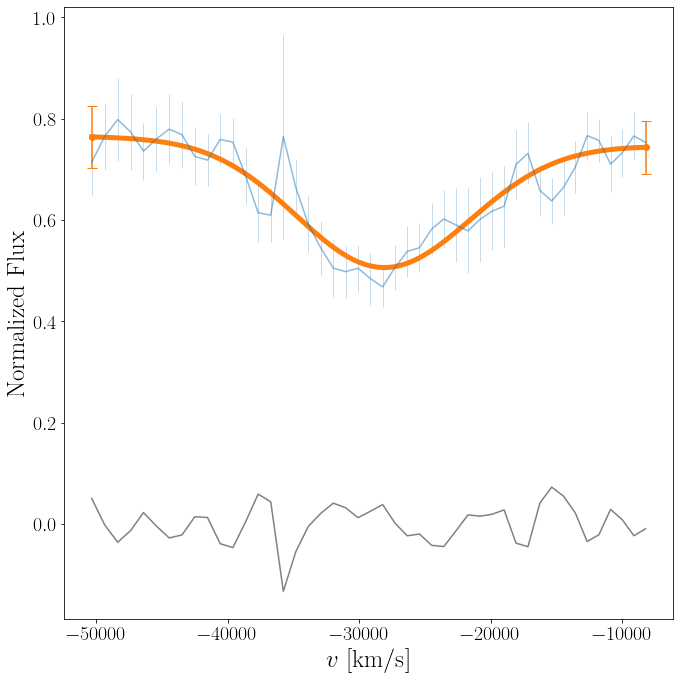

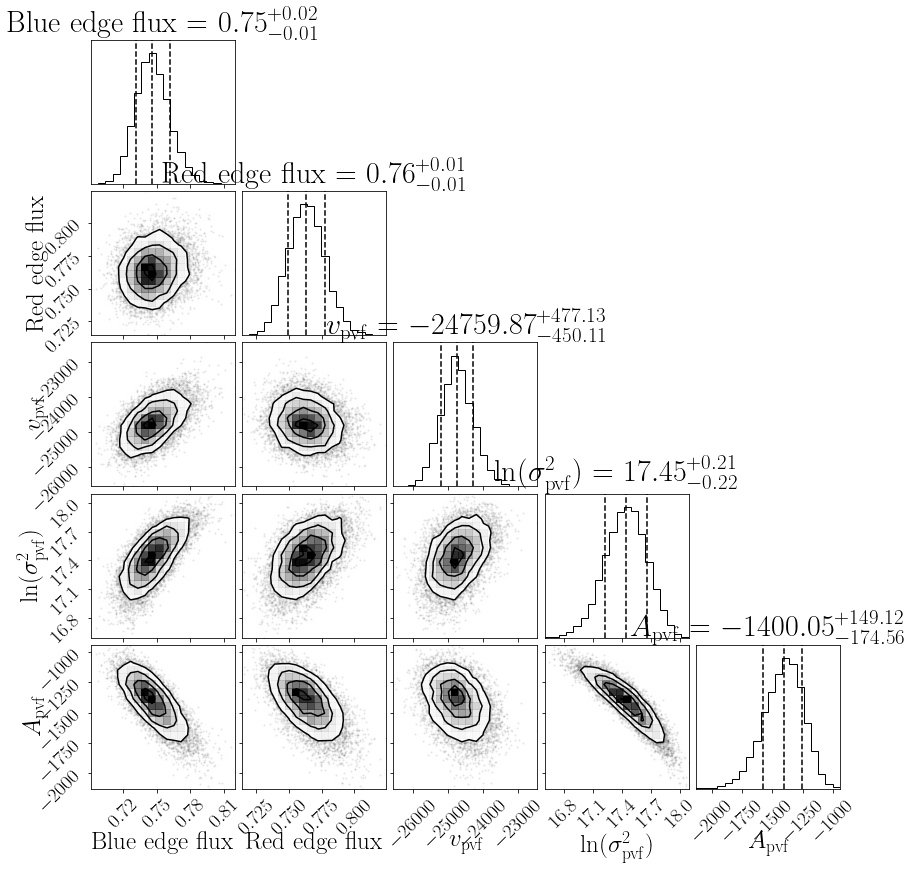

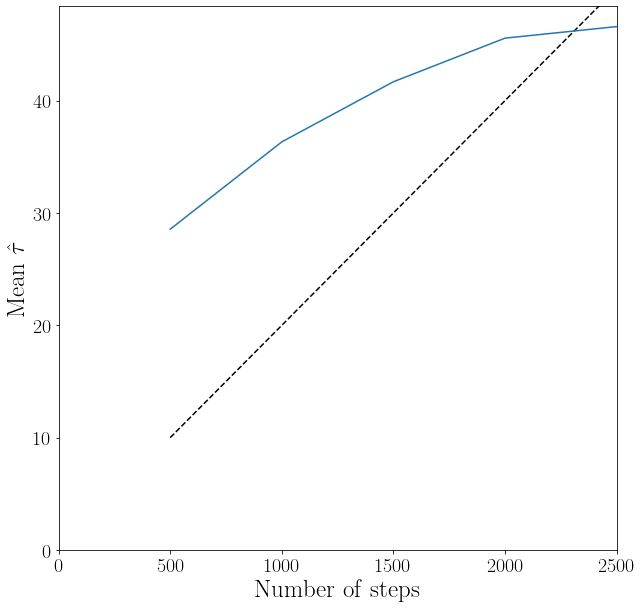

In [14]:
sampler = Spec1.line['CaII_IRT'].MCMC_sampler(initial=[1, 1, -25000, 15, -1000],
                                              normalize_unc=True,
                                              max_nsteps=1000,
                                              Plot_model=False)
sampler = Spec1.line['CaII_IRT'].MCMC_sampler(
    initial=Spec1.line['CaII_IRT'].theta_MCMC,
    normalize_unc=True,
    Plot_mcmc=True,
    Plot_tau=True)

## hvf + pvf

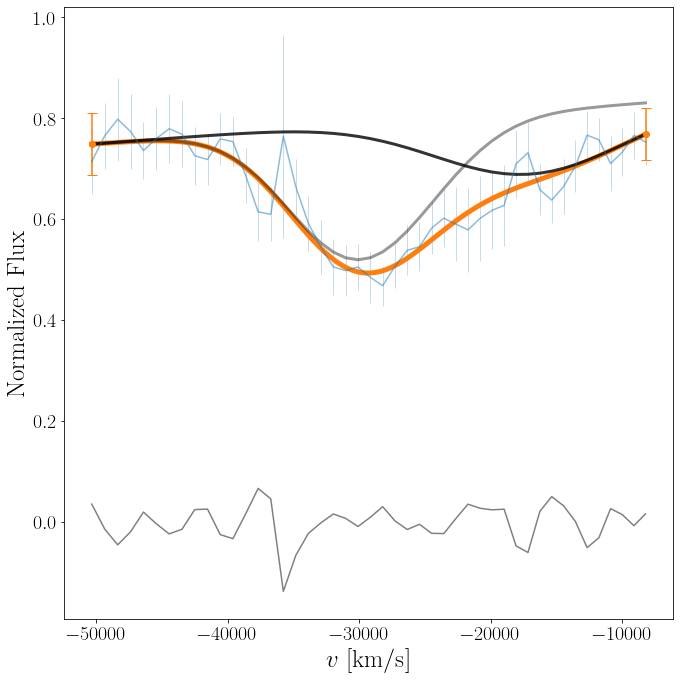

LS estimation:
Velocity pvf: -13531 km/s
Velocity hvf: -26389 km/s


In [17]:
Spec1.line['CaII_IRT'].LS_estimator(guess=(1, 1, -12000, 15, -1000, -25000, 15, -1000))

  0%|          | 0/1000 [00:00<?, ?it/s]

Normalize factor = 0.539


  0%|          | 4/50000 [00:00<27:45, 30.02it/s]

MCMC results:
Velocity pvf: -15198 pm 2674 km/s
Velocity hvf: -25735 pm 458 km/s
Normalize factor = 0.539


100%|██████████| 50000/50000 [36:02<00:00, 23.12it/s]   


MCMC results:
Velocity pvf: -15273 pm 2710 km/s
Velocity hvf: -25782 pm 382 km/s


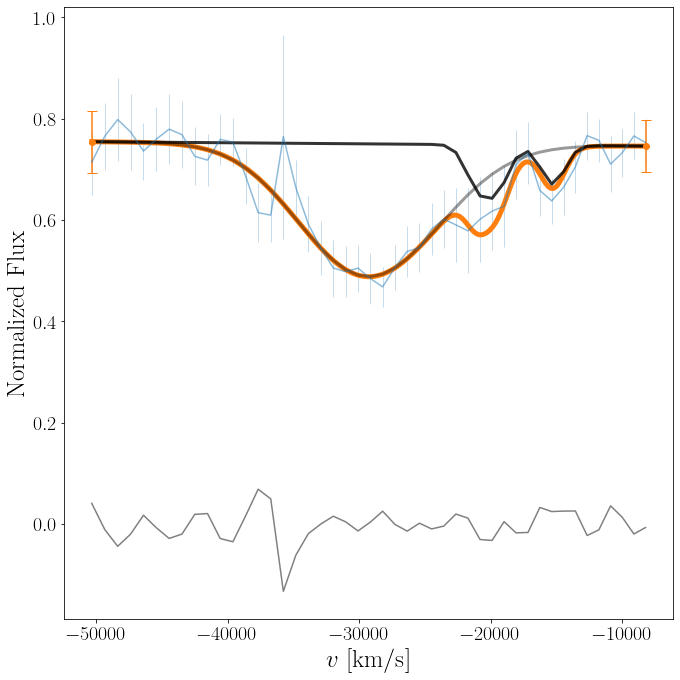

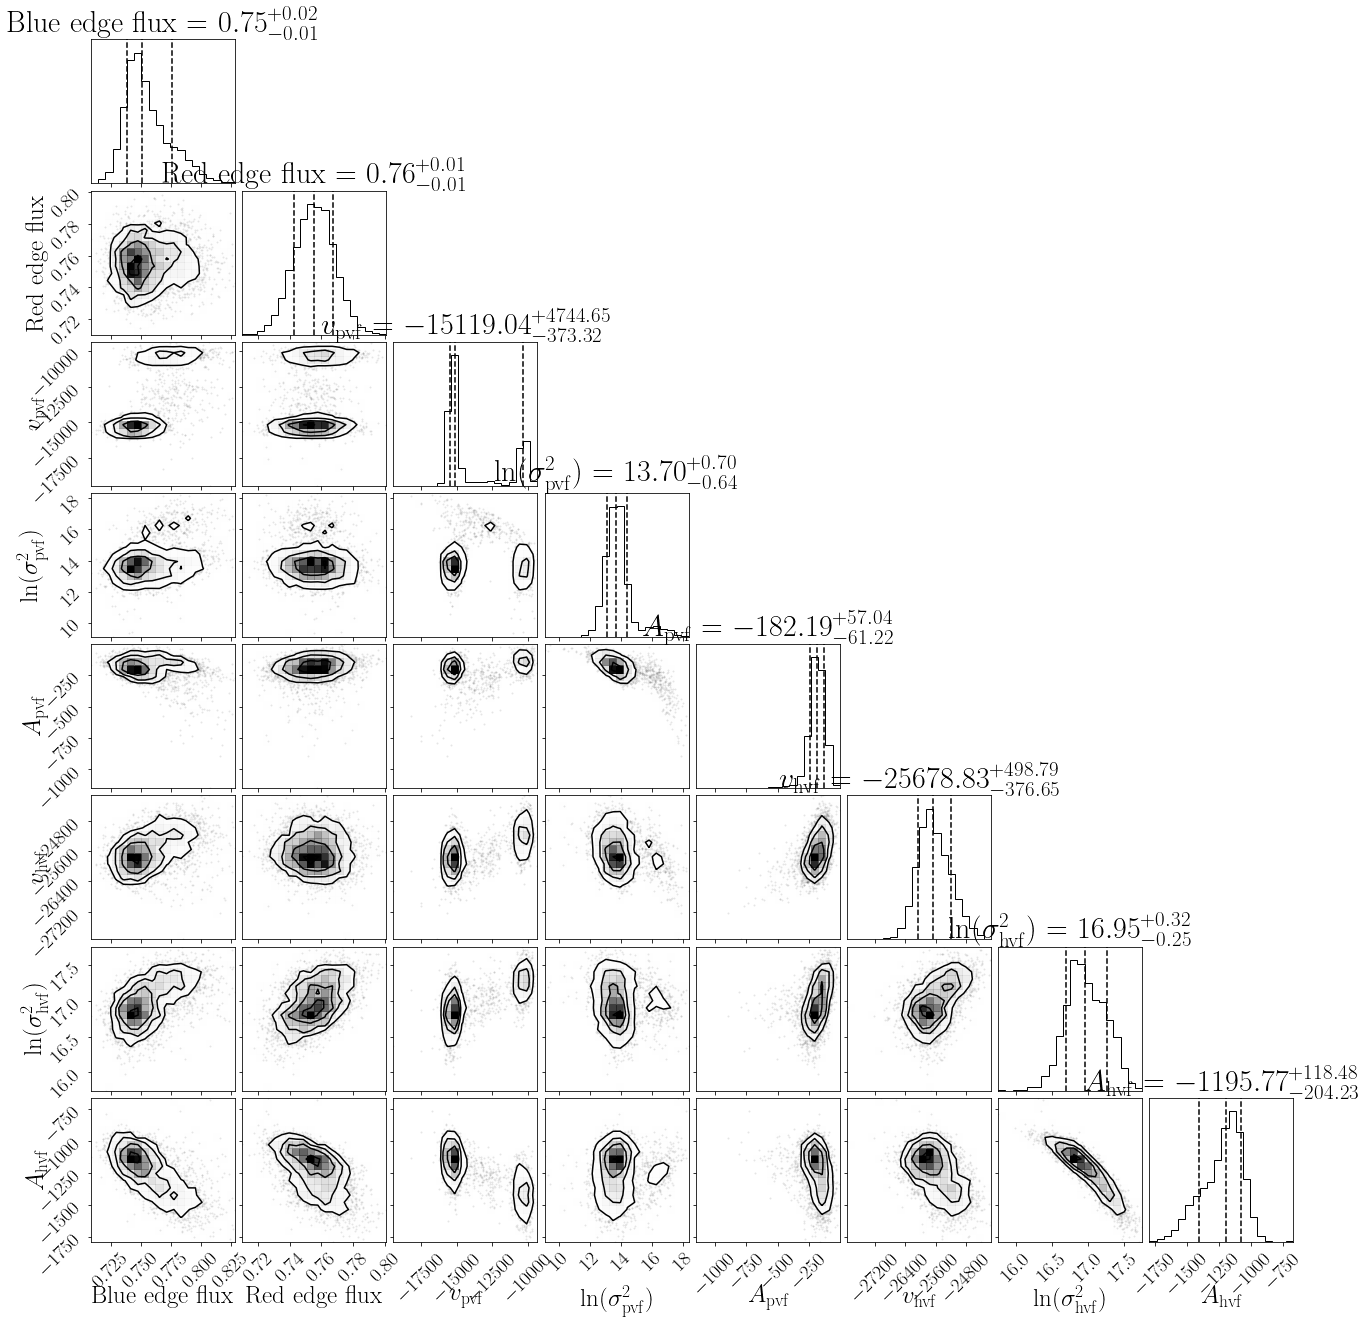

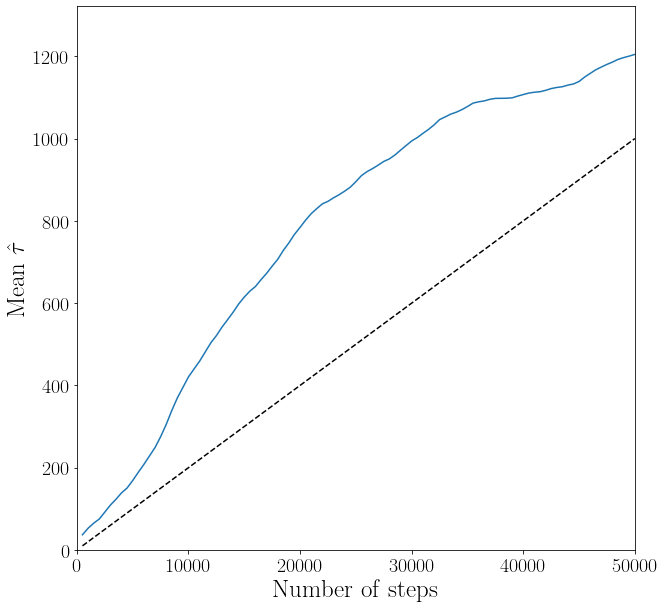

In [16]:
mu_pvf_prior = -12000
var_pvf_prior = 2e3**2
sampler = Spec1.line['CaII_IRT'].MCMC_sampler(mu_pvf=mu_pvf_prior,
                                              var_pvf=var_pvf_prior,
                                              initial=[1, 1, -12000, 15, -1000, -25000, 15, -1000],
                                              normalize_unc=True,
                                              max_nsteps=1000,
                                              Plot_model=False)
sampler = Spec1.line['CaII_IRT'].MCMC_sampler(
    mu_pvf=mu_pvf_prior,
    var_pvf=var_pvf_prior,
    initial=Spec1.line['CaII_IRT'].theta_MCMC,
    normalize_unc=True,
    Plot_mcmc=True,
    Plot_tau=True)